In [25]:
import numpy as np
from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib.pylab as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

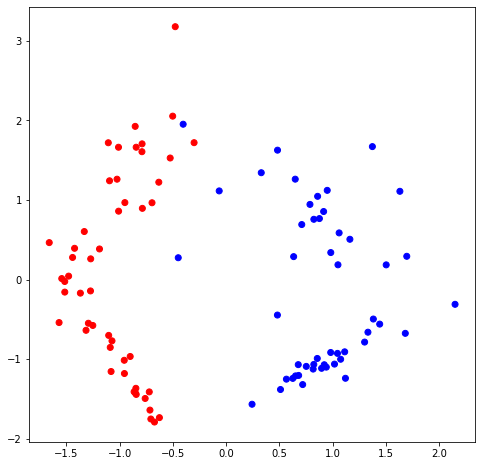

In [3]:
# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=100, 
                                       n_features=2, 
                                       n_informative=2,
                                       n_redundant=0, 
                                       n_classes=2, 
                                       random_state=1)
# datasets.make_blobs(centers = 2, cluster_std = 1.5, random_state=12)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

In [4]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [5]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

### Задание 1.
Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [21]:
def log_loss(w, X, y):
    m = X.shape[1]

    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X))
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    if np.isinf(loss):
        loss = 1e+8
    loss = np.squeeze(loss)
    grad = 1.0 / m * np.dot((A - y), X.T)
    
    return loss, grad

### Задание 2.
Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [39]:
def eval_model(X, y, max_iterations: int, min_dist=1e-6, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    dist = np.inf
    iter_ = 1
    before_loss = 0
    delta_loss = np.inf
    max_loss = 0.05
    while (delta_loss >= max_loss) and (iter_ <= max_iterations):
        loss, grad = log_loss(W, X, y)
        delta_loss = np.abs(loss - before_loss)
        before_loss = loss
        grad = grad.reshape(W.shape)
        delta = alpha * grad
        W -= delta
        dist = np.linalg.norm(delta, ord=2)
        if iter_ % (max_iterations / 10) == 0:
            print(iter_, W, loss)
        iter_ += 1
    return W

W = eval_model(X_train_tr, y_train_tr, 10)

1 [ 0.49675039 -0.13825883] 0.48424528830239266
2 [ 0.49678662 -0.13825335] 0.4842318606176869


In [15]:
W = eval_model(X_train_tr, y_train_tr, 1000)

ValueError: non-broadcastable output operand with shape (2,) doesn't match the broadcast shape (2,2)